In [1]:
#Activate package
import numpy as np
import pandas as pd

In [2]:
#extract data and give name
df = pd.read_csv("https://raw.githubusercontent.com/humayhasilli101/E-15---24-ML-/refs/heads/main/tips2.csv")

In [3]:
#check or heading dataset
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,NaN,Female,No,Sun,Dinner,4


In [4]:
  #remove unnecessary column
df = df.drop("Unnamed: 0",  axis = 1)

In [5]:
#get information about classes of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         241 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
#get descriptive stats of datsaet
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,241.0,3.490415,4.665933,1.00,2.0000,2.920,3.7100,50.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [7]:
#check for categorical uniqueness
df.nunique()

,0
total_bill,229
tip,122
sex,2
smoker,2
day,4
time,2
size,6


In [8]:
# Check categories
#Categorical variable standardization
df['day'].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


In [9]:
#df['day'] = df['day'].replace('Sunday', 'Saturday')

In [10]:
  #change data types
  df['sex'] = df['sex'].astype('category')
  df['smoker'] = df['smoker'].astype('category')
  df['day'] = df['day'].astype('category')
  df['time'] = df['time'].astype('category')
  df['size'] = df['size'].astype('int64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         241 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [12]:
#  calculate the bill per person and stores it in a new column called "bill_for_1person".
df["bill_for_1person"] = df["total_bill"] / df["size"]
df.head()

,total_bill,tip,sex,smoker,day,time,size,bill_for_1person
0,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
3,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
4,24.59,NaN,Female,No,Sun,Dinner,4,6.147500


In [13]:
# drop this new column
df = df.drop("bill_for_1person" , axis = 1)


In [14]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,NaN,Female,No,Sun,Dinner,4


In [15]:
#Highest tip amount
df.sort_values(by='tip', ascending = False)

,total_bill,tip,sex,smoker,day,time,size
179,34.63,50.0,Male,Yes,Sun,Dinner,2
110,14.00,42.0,Male,No,Sat,Dinner,2
24,19.82,36.0,Male,No,Sat,Dinner,2
170,50.81,10.0,Male,Yes,Sat,Dinner,3
212,48.33,9.0,Male,No,Sat,Dinner,4
...,...,...,...,...,...,...,...
67,3.07,1.0,Female,Yes,Sat,Dinner,1
236,12.60,1.0,Male,Yes,Sat,Dinner,2
4,24.59,NaN,Female,No,Sun,Dinner,4
25,17.81,NaN,Male,No,Sat,Dinner,4


In [16]:
##FIlter with and
df[(df['tip'] < 5) & (df['total_bill'] > 20)]

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
15,21.58,3.92,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
230,24.01,2.00,Male,Yes,Sat,Dinner,4
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2


In [17]:
##FIlter with or
df[(df['tip'] < 5) | (df['total_bill'] > 20)]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,NaN,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [18]:
# Only the first three rows of the DataFrame are returned.
df.iloc[0:3]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [19]:
#Only the first three rows are included.

#Only the first two columns (Name and Age) are included.
df.iloc[:3,:2]

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50


In [20]:
# Select tips greater than 5.
df[df.tip > 5]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
24,19.82,36.00,Male,No,Sat,Dinner,2
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
85,34.83,5.17,Female,No,Thur,Lunch,4
88,24.71,5.85,Male,No,Thur,Lunch,2
110,14.00,42.00,Male,No,Sat,Dinner,2
116,29.93,5.07,Male,No,Sun,Dinner,4


In [21]:
df["tip"].mean()

np.float64(3.4904149377593363)

In [22]:
df["tip"].max()

50.0

In [23]:
df["tip"].std()

4.665933435777806

In [24]:
#check null values
df.isnull().sum()

,0
total_bill,0
tip,3
sex,0
smoker,0
day,0
time,0
size,0


# Handling with NA
Handling missing values (NAs) is a crucial step in machine learning because most ML algorithms cannot work with missing data directly. How you handle them can significantly impact your model’s performance.

In [25]:
df.isnull().sum()

,0
total_bill,0
tip,3
sex,0
smoker,0
day,0
time,0
size,0


In [26]:
## SHow rows contain na
df[df.isnull().any(axis=1)]

,total_bill,tip,sex,smoker,day,time,size
4,24.59,NaN,Female,No,Sun,Dinner,4
25,17.81,NaN,Male,No,Sat,Dinner,4
79,17.29,NaN,Male,No,Thur,Lunch,2


In [27]:
# Remove rows with missing values
df_1 = df.dropna()

In [28]:
#Mean imputation:
df_2 = df.copy()
df_2['tip'].fillna(df_2['tip'].mean(), inplace=True)

/tmp/ipython-input-3335499931.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2['tip'].fillna(df_2['tip'].mean(), inplace=True)


In [29]:
df_2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.010000,Female,No,Sun,Dinner,2
1,10.34,1.660000,Male,No,Sun,Dinner,3
2,21.01,3.500000,Male,No,Sun,Dinner,3
3,23.68,3.310000,Male,No,Sun,Dinner,2
4,24.59,3.490415,Female,No,Sun,Dinner,4


In [30]:
df_2.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [31]:
df_2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.010000,Female,No,Sun,Dinner,2
1,10.34,1.660000,Male,No,Sun,Dinner,3
2,21.01,3.500000,Male,No,Sun,Dinner,3
3,23.68,3.310000,Male,No,Sun,Dinner,2
4,24.59,3.490415,Female,No,Sun,Dinner,4


In [32]:
df.select_dtypes(include=np.number).corr()

,total_bill,tip,size
total_bill,1.000000,0.247719,0.598315
tip,0.247719,1.000000,0.084956
size,0.598315,0.084956,1.000000


# Outlier problem

An outlier is a data point that is significantly different from other observations in your dataset. It may be much higher or lower than the typical values.
Dataset of house prices in a city: $100k, $120k, $110k, $115k, $10,000,000 → $10,000,000 is an outlier.
Outliers can distort your model because most ML algorithms assume that the data follows a certain pattern.


How to handle outliers :
Remove them if they are clearly errors.
Cap or floor them (replace with boundary values).



# IQR (Interquartile Range) = Q3 - Q1
# Lower outlier threshold: Q1 - 1.5 * IQR
# Upper outlier threshold: Q3 + 1.5 * IQR


<Axes: >

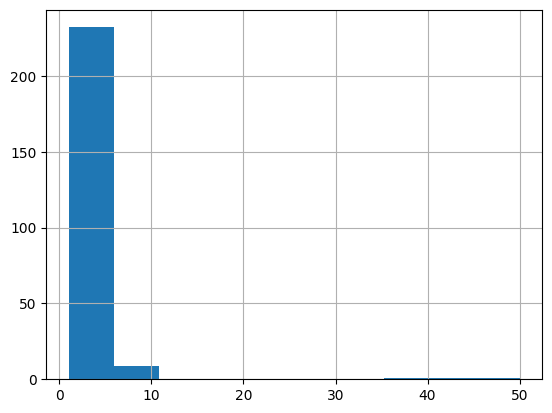

In [33]:
df_2['tip'].hist()

In [34]:
df_tip = df_2["tip"]
df_tip.describe().T

,tip
count,244.000000
mean,3.490415
std,4.637042
min,1.000000
25%,2.000000
50%,3.000000
75%,3.687500
max,50.000000


In [35]:
Q1 = df_tip.quantile(0.25)
Q3 = df_tip.quantile(0.75)
IQR = Q3-Q1

In [36]:

below = Q1- 1.5*IQR
above = Q3 + 1.5*IQR

In [37]:
below

np.float64(-0.53125)

In [38]:
df_2[df_2["tip"] > above]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
24,19.82,36.00,Male,No,Sat,Dinner,2
59,48.27,6.73,Male,No,Sat,Dinner,4
110,14.00,42.00,Male,No,Sat,Dinner,2
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
179,34.63,50.00,Male,Yes,Sun,Dinner,2
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3


In [39]:
# Save clear data
clear_df = df_1[df_1["tip"] < above].dropna().reset_index()

In [71]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

# Define independent variables (X) and dependent variable (y)
X = clear_df[['total_bill', 'size']]  # predictors
y = clear_df['tip']                   # target

# Create linear regression model
model = LinearRegression()

# Fit model on the entire dataset
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate SSE (Sum of Squared Errors)
sse = np.sum((y - y_pred) ** 2)

# Calculate MSE (Mean Squared Error)
mse = sse / len(y)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Print results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("SSE:", sse)
print("MSE:", mse)
print("RMSE:", rmse)

# Optional: R^2
r2 = model.score(X, y)
print("R^2 Score:", r2)


Coefficients: [0.07032171 0.20277299]
Intercept: 0.9984325104250864
SSE: 186.31720999401813
MSE: 0.8065680086321131
RMSE: 0.8980913141947834
R^2 Score: 0.3815077323063989


In [74]:
import statsmodels.api as sm

# Add a constant to the independent variables for statsmodels
X_with_constant = sm.add_constant(X)

# Create and fit the OLS (Ordinary Least Squares) model
model_sm = sm.OLS(y, X_with_constant).fit()
# Print the model summary, which includes p-values
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     70.32
Date:                Tue, 04 Nov 2025   Prob (F-statistic):           1.63e-24
Time:                        12:10:59   Log-Likelihood:                -302.95
No. Observations:                 231   AIC:                             611.9
Df Residuals:                     228   BIC:                             622.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9984      0.182      5.500      0.0

#We do train-test splitting in machine learning to evaluate how well our model will perform on new, unseen data.
##You split your data into two parts:

##Training set → used to teach the model

##Test set → used to check how well the model works on new data

##Think of it like studying for an exam:

##You practice on some questions (train set)

##Then the exam has new questions (test set) to see if you really learned.
##Usually 70-80% train, 20-30% test.

In [41]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns



# Define features and target
X = clear_df[['total_bill', 'size']]
y = clear_df['tip']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression model
model = LinearRegression()

# Train model on training data
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Function to calculate SSE, MSE, RMSE, R2
def regression_metrics(y_true, y_pred):
    sse = np.sum((y_true - y_pred)**2)
    mse = sse / len(y_true)
    rmse = np.sqrt(mse)
    r2 = np.corrcoef(y_true, y_pred)[0,1]**2  # alternative: model.score(X, y)
    return sse, mse, rmse, r2

# Calculate metrics for training set
train_sse, train_mse, train_rmse, train_r2 = regression_metrics(y_train, y_train_pred)

# Calculate metrics for test set
test_sse, test_mse, test_rmse, test_r2 = regression_metrics(y_test, y_test_pred)

# Print results
print("=== Training Set ===")
print("SSE:", train_sse)
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("R^2:", train_r2)

print("\n=== Test Set ===")
print("SSE:", test_sse)
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R^2:", test_r2)

=== Training Set ===
SSE: 148.44091905143875
MSE: 0.8067441252795584
RMSE: 0.8981893593666974
R^2: 0.37970140490064214

=== Test Set ===
SSE: 37.99239110727909
MSE: 0.8083487469633849
RMSE: 0.899082169194443
R^2: 0.38615516971272607


##For each 1-unit increase in total_bill, the tip increases by 0.07 units on average,
##holding all other variables constant.
##For each additional person at the table, the tip increases by 0.20 units on average,
##The intercept represents the predicted tip when all independent variables are zero — that is:
##when total_bill = 0, and
##size = 0.Intercept = 0.99 → the model’s baseline predicted tip.

## Underfitting
### Definition: Model is too simple to capture the patterns in the data.
###Problem: Poor performance on both training and test data.
###Symptoms: Training error is high
###Test error is also high

###Solution:Icrease model complexity (e.g., add more features, use non-linear models)

#Overfitting
###Definition: Model is too complex and fits the training data too perfectly, including noise.
###Problem: Great performance on training data but poor performance on test/new data.
###Symptoms: Training error is very low
###Test error is high
###Train-test splitting helps detect overfitting: if test error is much higher than training error → overfitting

# Overfitting example:
## RMSE(train) = 0.89
## RMSE(test) = 4.7
## This large gap between training and testing RMSE clearly shows overfitting.

# Underfitting example:
## RMSE(train) = 4.5
## RMSE(test) = 5.2

# Desicion tree

In [42]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Define features and target
X = clear_df[['total_bill', 'size']]
y = clear_df['tip']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create Decision Tree model
# (you can change max_depth to control overfitting/underfitting)
model = DecisionTreeRegressor(
    criterion='squared_error',   # loss function for regression
    max_depth=8,                 # limit tree depth (None = full depth)
    min_samples_split=3,         # minimum samples required to split an internal node
    min_samples_leaf=2,          # minimum samples required in each leaf (min bucket)
    random_state=42
)

# Train model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Function to calculate SSE, MSE, RMSE, R²
def regression_metrics(y_true, y_pred):
    sse = np.sum((y_true - y_pred)**2)
    mse = sse / len(y_true)
    rmse = np.sqrt(mse)
    r2 = np.corrcoef(y_true, y_pred)[0, 1]**2
    return sse, mse, rmse, r2

# Calculate metrics
train_sse, train_mse, train_rmse, train_r2 = regression_metrics(y_train, y_train_pred)
test_sse, test_mse, test_rmse, test_r2 = regression_metrics(y_test, y_test_pred)

# Print results
print("=== Training Set ===")
print("SSE:", train_sse)
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("R²:", train_r2)

print("\n=== Test Set ===")
print("SSE:", test_sse)
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R²:", test_r2)



=== Training Set ===
SSE: 75.77790852564104
MSE: 0.4118364593784839
RMSE: 0.6417448553580184
R²: 0.683342500852246

=== Test Set ===
SSE: 55.6183888038982
MSE: 1.1833699745510255
RMSE: 1.0878280997248717
R²: 0.27735600484012485


=== Training Set ===
SSE: 107.3006478143183
MSE: 0.5831556946430342
RMSE: 0.7636463151505638
R²: 0.5516166194753329

=== Test Set ===
SSE: 43.495567442309635
MSE: 0.9254376051555242
RMSE: 0.9619966762705182
R²: 0.3515073569820973


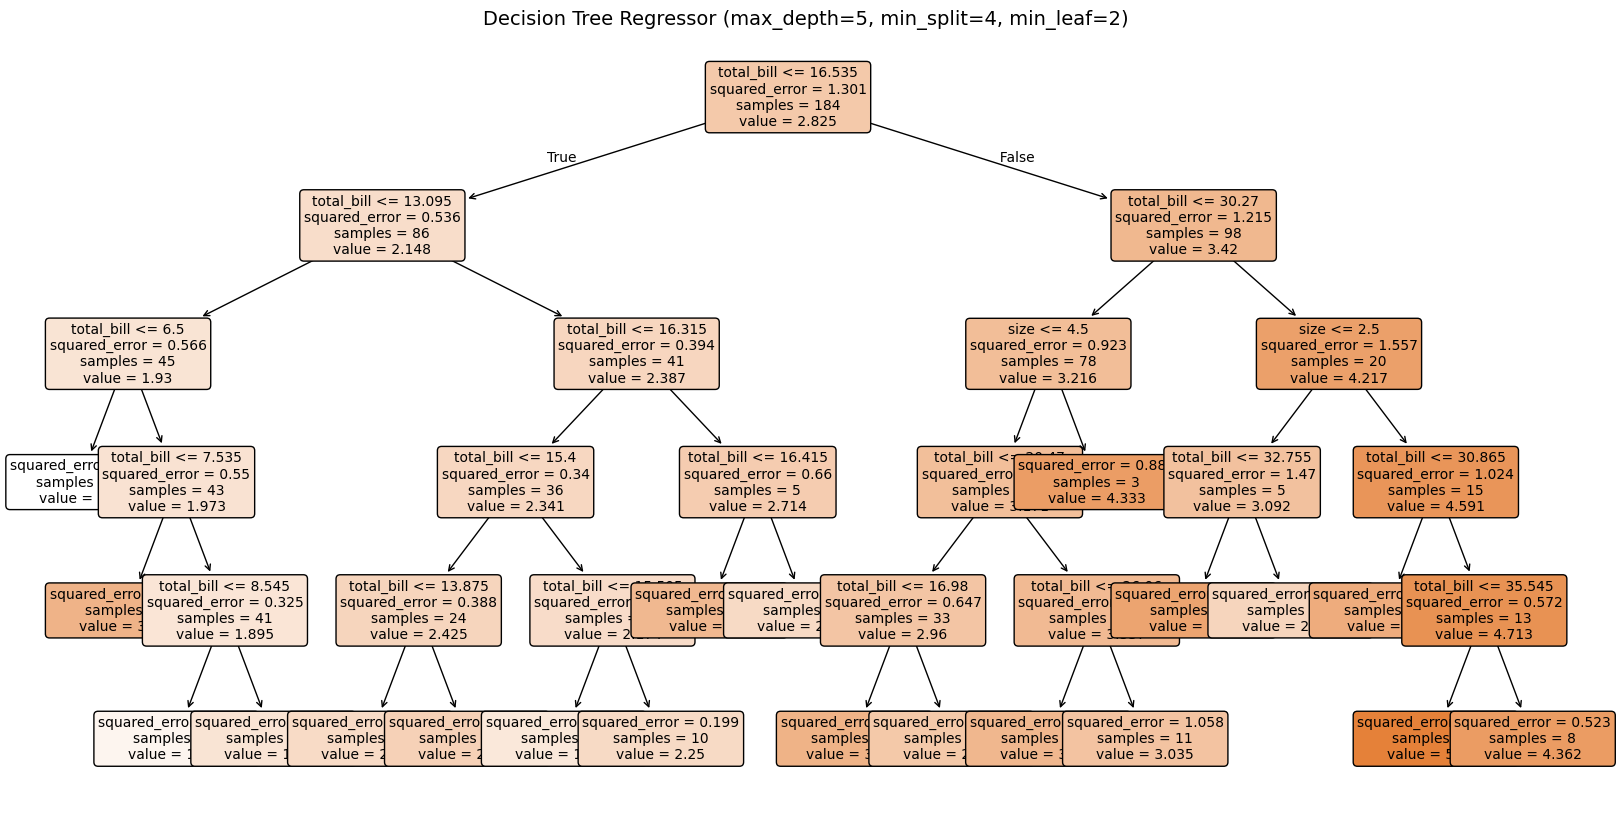

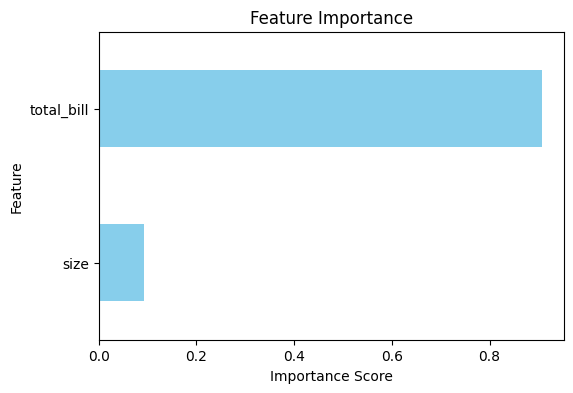

In [43]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define features and target
X = clear_df[['total_bill', 'size']]
y = clear_df['tip']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create Decision Tree model
model = DecisionTreeRegressor(
    criterion='squared_error',   # loss function for regression
    max_depth=5,                 # limit tree depth (None = full depth)
    min_samples_split=4,         # minimum samples required to split an internal node
    min_samples_leaf=2,          # minimum samples required in each leaf (min bucket)
    random_state=42
)

# Train model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Function to calculate SSE, MSE, RMSE, R²
def regression_metrics(y_true, y_pred):
    sse = np.sum((y_true - y_pred)**2)
    mse = sse / len(y_true)
    rmse = np.sqrt(mse)
    r2 = np.corrcoef(y_true, y_pred)[0, 1]**2
    return sse, mse, rmse, r2

# Calculate metrics
train_sse, train_mse, train_rmse, train_r2 = regression_metrics(y_train, y_train_pred)
test_sse, test_mse, test_rmse, test_r2 = regression_metrics(y_test, y_test_pred)

# Print results
print("=== Training Set ===")
print("SSE:", train_sse)
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("R²:", train_r2)

print("\n=== Test Set ===")
print("SSE:", test_sse)
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R²:", test_r2)

# === Visualization 1: Decision Tree Structure ===
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Regressor (max_depth=5, min_split=4, min_leaf=2)", fontsize=14)
plt.show()

# === Visualization 2: Feature Importance ===
importance = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(6, 4))
importance.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

Feature importance in a decision tree shows how much each feature contributes to the model’s predictions. It helps identify which features are most influential in making decisions.

# Why it’s useful

## Helps understand the model (explainability).

## Can guide feature selection (remove unimportant features).

## Useful for insight into the dataset: which features matter most for predictions.

In [44]:
importance

,0
total_bill,0.906612
size,0.093388


# Random Forest

###🌳 What is a Random Forest?

### Random Forest is a powerful ensemble learning algorithm based on Decision Trees.
### It combines the predictions of many individual decision trees to make a more accurate and stable prediction.
##🧠 Key Idea

###A single decision tree is easy to understand, but it can overfit — meaning it learns the training data too well and performs poorly on unseen data.

###A Random Forest reduces overfitting by:

###Building many trees on different random subsets of the data and features.

###Combining (averaging or voting) their results.

###This randomness ensures that no single tree dominates the model.

## Key Differences from Single Decision Tree:
##n_estimators → number of trees in the forest. More trees → more stable predictions.

#⚙️ How It Works

###Bootstrap Sampling (Bagging):
###The algorithm takes random samples with replacement from the training data to train each tree (called bagging).

###Random Feature Selection:
###At each split in a tree, it considers only a random subset of features instead of all.

###Aggregation:

###For regression: it averages the outputs of all trees.

###For classification: it takes a majority vote.

=== Training Set ===
SSE: 121.49969538537019
MSE: 0.6603244314422293
RMSE: 0.8126034896813016
R²: 0.49471233347710203

=== Test Set ===
SSE: 36.64976280303871
MSE: 0.779782187298696
RMSE: 0.8830527658632275
R²: 0.4160212069770363


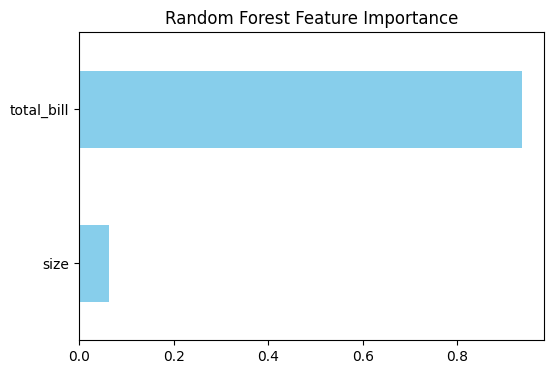

In [45]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define features and target
X = clear_df[['total_bill', 'size']]
y = clear_df['tip']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create Random Forest model
# (n_estimators = number of trees, can tune max_depth, min_samples_split, etc.)
model = RandomForestRegressor(
    n_estimators=150,          # number of trees
    max_depth = 4,                # limit depth of each tree
    min_samples_split=5,        # minimum samples to split
    min_samples_leaf=5,         # minimum samples in a leaf
    random_state=42
)

# Train model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Function to calculate SSE, MSE, RMSE, R²
def regression_metrics(y_true, y_pred):
    sse = np.sum((y_true - y_pred)**2)
    mse = sse / len(y_true)
    rmse = np.sqrt(mse)
    r2 = np.corrcoef(y_true, y_pred)[0, 1]**2
    return sse, mse, rmse, r2

# Calculate metrics
train_sse, train_mse, train_rmse, train_r2 = regression_metrics(y_train, y_train_pred)
test_sse, test_mse, test_rmse, test_r2 = regression_metrics(y_test, y_test_pred)

# Print results
print("=== Training Set ===")
print("SSE:", train_sse)
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("R²:", train_r2)

print("\n=== Test Set ===")
print("SSE:", test_sse)
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R²:", test_r2)

# Optional: Feature importance
import matplotlib.pyplot as plt
importance = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(6,4))
importance.sort_values().plot(kind='barh', color='skyblue')
plt.title("Random Forest Feature Importance")
plt.show()

#Handling with Overfitting in Tree based Models
##Increase n_estimators
###More trees → better generalization.
###Too many trees increase computation but rarely cause overfitting.
##Limit max_depth
###Increase min_samples_split and min_samples_leaf
##More training data
###Random Forest generalizes better with more data.
###Small datasets → higher chance of memorizing → overfitting.

#One-hot encoding / Dummy variable

##is a way to convert categorical variables (like “Color”: Red, Green, Blue) into a numeric format that machine learning models can understand. Most ML algorithms cannot work directly with text, so we transform categories into 0s and 1s.

In [47]:
# 1️⃣ Identify categorical columns
categorical_cols = clear_df.select_dtypes(include=['object', 'category']).columns

# 2️⃣ Create dummy variables (0 and 1) and drop the first category
clear_df_encoded = pd.get_dummies(clear_df, columns=categorical_cols, drop_first=True)

# 3️⃣ Convert any boolean columns to 0 and 1 (not 2)
for col in clear_df_encoded.columns:
    if clear_df_encoded[col].dtype == 'bool':
        clear_df_encoded[col] = clear_df_encoded[col].map({False: 0, True: 1})

# 4️⃣ View result
display(clear_df_encoded.head())

,index,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,0,16.99,1.01,2,0,0,0,1,0,0
1,1,10.34,1.66,3,1,0,0,1,0,0
2,2,21.01,3.50,3,1,0,0,1,0,0
3,3,23.68,3.31,2,1,0,0,1,0,0
4,5,25.29,4.71,4,1,0,0,1,0,0


=== Training Set ===
SSE: 94.28657098943535
MSE: 0.5124270162469312
RMSE: 0.7158400772846762
R²: 0.6142287493261728

=== Test Set ===
SSE: 37.28831624122851
MSE: 0.7933684306644363
RMSE: 0.8907123164436631
R²: 0.41280442944111273


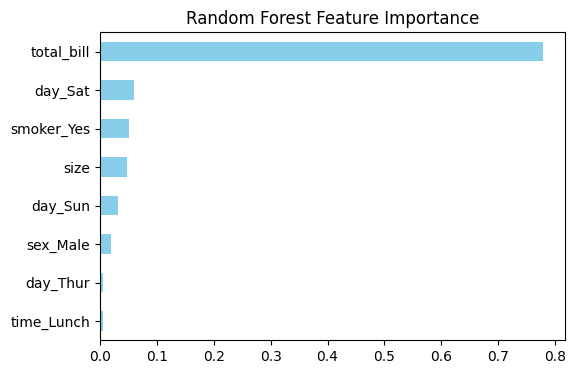

In [75]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define features and target
X = clear_df_encoded.drop(columns=['tip' , 'index' ])
y = clear_df_encoded['tip']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create Random Forest model
# (n_estimators = number of trees, can tune max_depth, min_samples_split, etc.)
model = RandomForestRegressor(
    n_estimators=150,          # number of trees
    max_depth = 10,                # limit depth of each tree
    min_samples_split=10,        # minimum samples to split
    min_samples_leaf=5,         # minimum samples in a leaf
    random_state=42
)

# Train model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Function to calculate SSE, MSE, RMSE, R²
def regression_metrics(y_true, y_pred):
    sse = np.sum((y_true - y_pred)**2)
    mse = sse / len(y_true)
    rmse = np.sqrt(mse)
    r2 = np.corrcoef(y_true, y_pred)[0, 1]**2
    return sse, mse, rmse, r2

# Calculate metrics
train_sse, train_mse, train_rmse, train_r2 = regression_metrics(y_train, y_train_pred)
test_sse, test_mse, test_rmse, test_r2 = regression_metrics(y_test, y_test_pred)

# Print results
print("=== Training Set ===")
print("SSE:", train_sse)
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("R²:", train_r2)

print("\n=== Test Set ===")
print("SSE:", test_sse)
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R²:", test_r2)

# Optional: Feature importance
import matplotlib.pyplot as plt
importance = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(6,4))
importance.sort_values().plot(kind='barh', color='skyblue')
plt.title("Random Forest Feature Importance")
plt.show()

=== Training Set ===
SSE: 118.6402099772815
MSE: 0.6447837498765299
RMSE: 0.8029842774777909
R²: 0.5080729698813623

=== Test Set ===
SSE: 34.99370872270517
MSE: 0.74454699410011
RMSE: 0.8628713659057821
R²: 0.4458193415855554


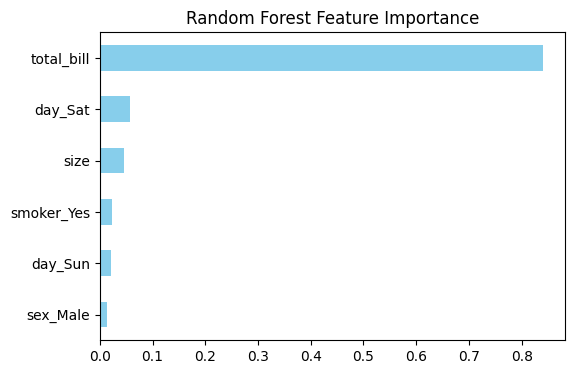

In [56]:
#Exclude unuseful variables

# Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define features and target
X = clear_df_encoded.drop(columns=['tip' , 'index', 'day_Thur', 'time_Lunch' ])
y = clear_df_encoded['tip']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create Random Forest model
# (n_estimators = number of trees, can tune max_depth, min_samples_split, etc.)
model = RandomForestRegressor(
    n_estimators=150,          # number of trees
    max_depth = 4,                # limit depth of each tree
    min_samples_split=10,        # minimum samples to split
    min_samples_leaf=10,         # minimum samples in a leaf
    random_state=42
)

# Train model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Function to calculate SSE, MSE, RMSE, R²
def regression_metrics(y_true, y_pred):
    sse = np.sum((y_true - y_pred)**2)
    mse = sse / len(y_true)
    rmse = np.sqrt(mse)
    r2 = np.corrcoef(y_true, y_pred)[0, 1]**2
    return sse, mse, rmse, r2

# Calculate metrics
train_sse, train_mse, train_rmse, train_r2 = regression_metrics(y_train, y_train_pred)
test_sse, test_mse, test_rmse, test_r2 = regression_metrics(y_test, y_test_pred)

# Print results
print("=== Training Set ===")
print("SSE:", train_sse)
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("R²:", train_r2)

print("\n=== Test Set ===")
print("SSE:", test_sse)
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R²:", test_r2)

# Optional: Feature importance
import matplotlib.pyplot as plt
importance = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(6,4))
importance.sort_values().plot(kind='barh', color='skyblue')
plt.title("Random Forest Feature Importance")
plt.show()

In [69]:
#Save model
import pickle
# Save
with open('my_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [70]:
# Load
with open('my_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)